In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import math
%matplotlib inline

import sys
sys.path.insert(0, '../scripts')

import stft_zoom, display, detect_musical_regions
from util import fft_frequencies
import mappings
import pickle
import PIL
import IPython.display

In [2]:
model = pickle.load(open('renyi_shannon_prollharm_model.sav', 'rb'))

In [3]:
n_fft=2048
kernel=[800,800]
y, sr = librosa.load('../../midi-experiment/notebooks/testee.wav', sr=44100)
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]

In [47]:
spec_512 = np.abs(librosa.stft(y,n_fft=512, hop_length=512//4, center=False, window='boxcar'))
spec_4096 = np.abs(librosa.stft(y,n_fft=4096, hop_length=4096//4, center=False, window='boxcar'))

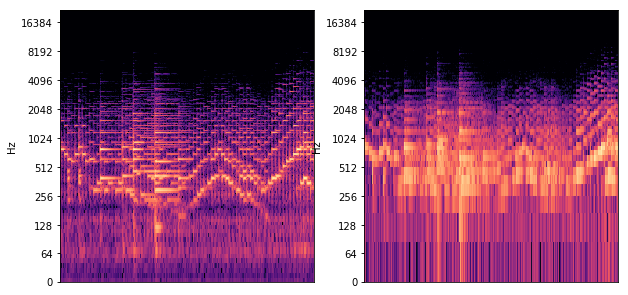

In [5]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(spec_4096, ref=np.max), y_axis='log', sr=44100)

plt.subplot(1,2,2)
librosa.display.specshow(librosa.amplitude_to_db(spec_512, ref=np.max), y_axis='log', sr=44100)

In [39]:
scipy.signal.hann(4096)

array([  0.00000000e+00,   5.88561497e-07,   2.35424460e-06, ...,
         2.35424460e-06,   5.88561497e-07,   0.00000000e+00])

In [48]:
yy = y[:4096]

In [49]:
np.sum(yy ** 2)

1.1960108

In [50]:
(np.sum(spec_4096[:,0] ** 2) + np.sum(spec_4096[1:2048,0] ** 2))/ 4096

1.196010947227478

In [52]:
sum((np.sum(spec_512[:,k] ** 2) + np.sum(spec_512[1:256,k] ** 2))/ 512 for k in range(0,32,4))

1.1960106901824474

In [32]:
np.sum(spec_512[:,1] ** 2)/ np.sqrt(512)

0.13017055216260834

In [ ]:
np.sum(spec_512)/np.max(spec_512)

In [9]:
np.sum(spec_512)/np.max(spec_512)

3440.0308

In [24]:
spec_2048 = np.abs(librosa.stft(y,n_fft=2048, hop_length=2048//4))
spec_1024 = np.abs(librosa.stft(y,n_fft=1024, hop_length=1024//4))

In [25]:
np.sum(spec_4096)/np.sum(spec_2048)

1.2144668

In [26]:
np.sum(spec_2048)/np.sum(spec_1024)

1.1862581

In [27]:
np.sum(spec_1024)/np.sum(spec_512)

1.2026058

In [5]:
singleres_spec = spec

In [6]:
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 

indices, original_shape = detect_musical_regions.detect_musical_regions(model, spec, mode='threshold', pct_or_threshold=0.8)
to_be_refined = detect_musical_regions.musical_regions_to_ranges(indices, original_shape, x_axis, y_axis, kernel)

In [10]:
# Depois nos preocupamos com a estrutura de dados. Por enquanto, enfileirar todas as matrizes em uma lista e pronto.
refined_subregions = []

for subregion in to_be_refined:

    freq_range = subregion[0]
    time_range = subregion[1]
    spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=3)
    refined_subregions.append([spec_zoom, x_axis, y_axis, time_range, freq_range, new_sr, window_size, hop_size])

ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
ring mod + lpf
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
ring mod + lpf
ring mod + lpf
rin

In [11]:
spec_img = PIL.Image.fromarray(spec).resize((spec.shape[1], 2049))
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, [2049, spec.shape[1]])

for subregion in refined_subregions[:]:
    t_r = subregion[3]
    f_r = subregion[4]
    spec_img = detect_musical_regions.insert_zoom(spec_img, subregion[0], t_r, f_r, x_axis, y_axis)
    
multires_spec = np.asarray(spec_img)

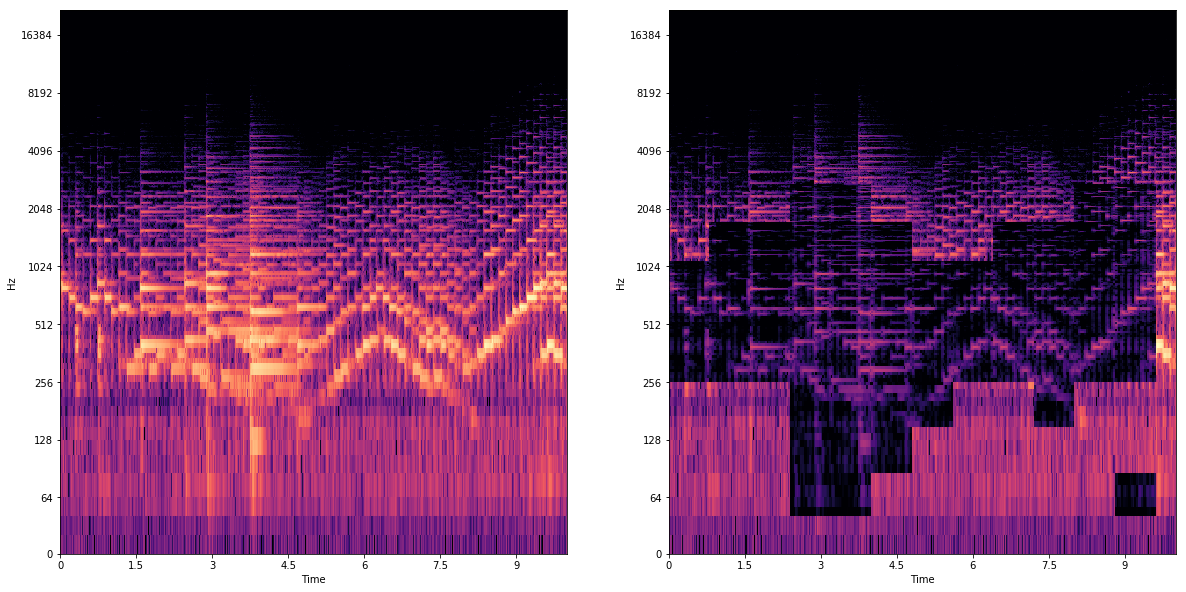

In [14]:
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), y_axis='log', x_axis='time', sr=sr)

plt.subplot(1,2,2)
librosa.display.specshow(librosa.amplitude_to_db(multires_spec, ref=np.max), y_axis='log', x_axis='time', sr=sr)